In [59]:
import pandas as pd
import numpy as np
import seaborn as sns

In [60]:
df1=pd.read_csv("missing_value_imputation.csv")
df=df1.copy()

In [61]:
pd.set_option("display.max_columns",None)

In [62]:
df.head()

,brand,price,thickness,weight,screen_size,ppi,threads,ram,antiglare,touch_screen,cores,battery_capacity,battery_cell,hdmi,ethernet,multi_card_reader,thunderbolt,display_port,vga,backlit,fingerprint_sensor,usb2,usb3,typec,processor_gen,processor_brand,processor_model,graphics_brand,graphics_capacity,graphics_model,everyday_use,business,performance,gaming,hdd,ssd,popularity,quality_type,ppi_type,thickness_num,weight_num
0,Acer,25990,medium,lite,14,157,4.0,8.0,1,0,2.0,45.50,2.0,1,1,0,0,0,0,0,0,1.0,3.0,1.0,11.0,intel,i3,intel,0.0,Integrated,1,0,0,0,NaN,512.0,popular,low,high,21.6,1.50
1,Wings,34990,medium,medium,15,141,8.0,8.0,1,0,4.0,17.85,2.0,1,0,0,0,0,0,1,0,1.0,2.0,1.0,11.0,intel,i5,intel,0.0,Integrated,0,1,0,0,NaN,512.0,regular,high,medium,NaN,1.60
2,MSI,49990,medium,medium,15,141,12.0,16.0,1,0,8.0,51.00,3.0,1,1,0,1,0,0,1,0,0.0,3.0,1.0,12.0,intel,i5,intel,4.0,Integrated,0,0,1,0,NaN,512.0,regular,low,medium,21.7,1.86
3,Acer,79745,thick,heavy,15,141,12.0,8.0,1,0,8.0,86.00,6.0,1,1,0,0,0,0,1,0,0.0,3.0,1.0,13.0,intel,i5,nvidia,6.0,rtx4050,0,0,0,1,NaN,512.0,regular,medium,medium,25.9,2.60
4,Acer,35990,medium,medium,15,141,12.0,16.0,1,0,6.0,36.00,3.0,1,1,1,0,0,0,0,0,1.0,2.0,1.0,5.0,amd,5,intel,0.0,Integrated,0,0,1,0,NaN,512.0,regular,low,medium,19.7,1.59


In [63]:
#First of all we are going to remove hdd , thickness_num, weight_num
df.drop(columns=["hdd","thickness_num","weight_num"],inplace=True)

In [64]:
df.head()

,brand,price,thickness,weight,screen_size,ppi,threads,ram,antiglare,touch_screen,cores,battery_capacity,battery_cell,hdmi,ethernet,multi_card_reader,thunderbolt,display_port,vga,backlit,fingerprint_sensor,usb2,usb3,typec,processor_gen,processor_brand,processor_model,graphics_brand,graphics_capacity,graphics_model,everyday_use,business,performance,gaming,ssd,popularity,quality_type,ppi_type
0,Acer,25990,medium,lite,14,157,4.0,8.0,1,0,2.0,45.50,2.0,1,1,0,0,0,0,0,0,1.0,3.0,1.0,11.0,intel,i3,intel,0.0,Integrated,1,0,0,0,512.0,popular,low,high
1,Wings,34990,medium,medium,15,141,8.0,8.0,1,0,4.0,17.85,2.0,1,0,0,0,0,0,1,0,1.0,2.0,1.0,11.0,intel,i5,intel,0.0,Integrated,0,1,0,0,512.0,regular,high,medium
2,MSI,49990,medium,medium,15,141,12.0,16.0,1,0,8.0,51.00,3.0,1,1,0,1,0,0,1,0,0.0,3.0,1.0,12.0,intel,i5,intel,4.0,Integrated,0,0,1,0,512.0,regular,low,medium
3,Acer,79745,thick,heavy,15,141,12.0,8.0,1,0,8.0,86.00,6.0,1,1,0,0,0,0,1,0,0.0,3.0,1.0,13.0,intel,i5,nvidia,6.0,rtx4050,0,0,0,1,512.0,regular,medium,medium
4,Acer,35990,medium,medium,15,141,12.0,16.0,1,0,6.0,36.00,3.0,1,1,1,0,0,0,0,0,1.0,2.0,1.0,5.0,amd,5,intel,0.0,Integrated,0,0,1,0,512.0,regular,low,medium


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   brand               798 non-null    object 
 1   price               798 non-null    int64  
 2   thickness           798 non-null    object 
 3   weight              798 non-null    object 
 4   screen_size         798 non-null    int64  
 5   ppi                 798 non-null    int64  
 6   threads             798 non-null    float64
 7   ram                 798 non-null    float64
 8   antiglare           798 non-null    int64  
 9   touch_screen        798 non-null    int64  
 10  cores               798 non-null    float64
 11  battery_capacity    798 non-null    float64
 12  battery_cell        798 non-null    float64
 13  hdmi                798 non-null    int64  
 14  ethernet            798 non-null    int64  
 15  multi_card_reader   798 non-null    int64  
 16  thunderb

In [66]:
from sklearn.preprocessing import OrdinalEncoder
cat_cols=df.select_dtypes(include=["object"]).columns
oe=OrdinalEncoder()
for col in cat_cols:
    df[col]=oe.fit_transform(df[[col]])
    print(oe.categories_)
#splitting the dataset
x_label=df.drop("price",axis=1)
y_label=df["price"]

[array(['ASUS', 'AXL', 'Acer', 'Apple', 'Asus', 'Avita', 'Chuwi', 'Dell',
       'Fujitsu', 'Gigabyte', 'HP', 'Honor', 'Huawei', 'Infinix', 'LG',
       'Lenovo', 'MSI', 'Ninkear', 'Primebook', 'Razer', 'Realme',
       'Samsung', 'Ultimus', 'Vaio', 'Walker', 'Wings', 'Xiaomi'],
      dtype=object)]
[array(['medium', 'slim', 'thick'], dtype=object)]
[array(['heavy', 'lite', 'medium'], dtype=object)]
[array(['amd', 'apple', 'intel', 'mediatek'], dtype=object)]
[array(['3', '5', '7', 'M1', 'M2', 'i3', 'i5', 'i7', 'i9'], dtype=object)]
[array(['amd', 'apple', 'arm', 'intel', 'nvidia'], dtype=object)]
[array(['Integrated', 'gtx1650', 'gtx2050', 'mx130', 'mx450', 'mx550',
       'mx570', 'rtx2050', 'rtx2060', 'rtx3050', 'rtx3060', 'rtx3070ti',
       'rtx3080ti', 'rtx4050', 'rtx4060', 'rtx4070', 'rtx4080', 'rtx4090',
       'rx5600m', 'rx6500m', 'rx7600s', 't500', 't550', 't600'],
      dtype=object)]
[array(['popular', 'regular', 'viral'], dtype=object)]
[array(['high', 'low', 'medium'], d

In [67]:
y_label

0       25990
1       34990
2       49990
3       79745
4       35990
        ...  
793    144990
794     92990
795    112990
796     99990
797     58990
Name: price, Length: 798, dtype: int64

## 1:-Correlation Analysis

<Axes: >

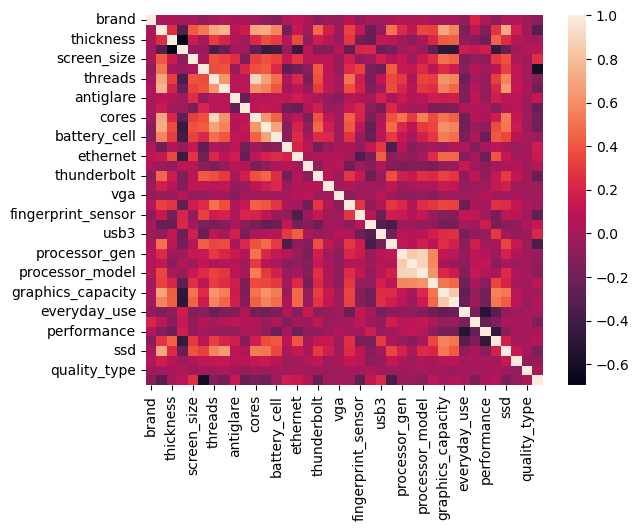

In [68]:
sns.heatmap(df.corr())

In [69]:
fi_df1=df.corr()["price"].to_frame().reset_index().rename(columns={"index":"feature","price":"corr_coeff"}).sort_values(by="corr_coeff",ascending=False)
fi_df1

,feature,corr_coeff
1,price,1.000000
7,ram,0.753897
11,battery_capacity,0.715684
34,ssd,0.712238
28,graphics_capacity,0.701258
6,threads,0.700479
10,cores,0.700039
12,battery_cell,0.567468
29,graphics_model,0.565241
5,ppi,0.512422


## 2.Random Forest Feature Importance

In [70]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(x_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': x_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,ram,3.520326e-01
10,battery_capacity,2.302323e-01
27,graphics_capacity,8.531766e-02
5,threads,6.433814e-02
28,graphics_model,4.002892e-02
9,cores,3.358814e-02
33,ssd,2.675439e-02
25,processor_model,2.613202e-02
4,ppi,2.193458e-02
22,typec,2.016166e-02


## 3.Gradient Boosting Feature Importance

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(x_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': x_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,ram,0.314023
10,battery_capacity,0.172669
27,graphics_capacity,0.154554
33,ssd,0.063986
4,ppi,0.060332
5,threads,0.047260
28,graphics_model,0.044206
9,cores,0.023596
25,processor_model,0.023167
22,typec,0.016988


## 4.Permutation Importance

In [72]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(x_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': x_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
10,battery_capacity,1.491603e-01
6,ram,8.314067e-02
27,graphics_capacity,4.550783e-02
9,cores,2.976345e-02
28,graphics_model,2.162704e-02
25,processor_model,1.741761e-02
5,threads,1.342274e-02
22,typec,1.337919e-02
33,ssd,9.815923e-03
18,backlit,9.518895e-03


## 5.LASSO

In [73]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': x_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5


,feature,lasso_coeff
27,graphics_capacity,23150.531944
9,cores,18104.282508
6,ram,14334.607260
33,ssd,12066.477429
25,processor_model,7452.125887
8,touch_screen,5996.118992
11,battery_cell,5804.362054
10,battery_capacity,5281.570625
3,screen_size,5203.100079
4,ppi,3335.331254


## 6.RFE

In [74]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=x_label.shape[1], step=1)
selector_label = selector_label.fit(x_label, y_label)

# Get the selected features based on RFE
selected_features = x_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6


,feature,rfe_score
6,ram,3.536647e-01
10,battery_capacity,2.203601e-01
27,graphics_capacity,1.016849e-01
5,threads,5.613410e-02
9,cores,3.311539e-02
28,graphics_model,3.113240e-02
33,ssd,2.932852e-02
25,processor_model,2.820018e-02
22,typec,2.358051e-02
4,ppi,2.205901e-02


## 7.Linear regression weights

In [75]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': x_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,feature,reg_coeffs
27,graphics_capacity,23150.619246
9,cores,18104.550503
6,ram,14334.592589
33,ssd,12066.468324
25,processor_model,7452.334628
8,touch_screen,5996.149593
11,battery_cell,5804.340153
10,battery_capacity,5281.602516
3,screen_size,5203.116325
4,ppi,3335.334345


## 8.SHAP

In [ ]:
conda install -c conda-forge shap

In [76]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(x_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values


array([[-1093.13863907,   137.84870804,  -545.34960397, ...,
         -568.24018698,  -103.34722193,   469.09486699],
       [-4299.44817141,   -56.67698854,  -182.86173995, ...,
            8.13837303,   305.04756608,  -421.07107564],
       [-1933.41010095,  -170.03967987,  -538.23362807, ...,
          190.22828674,  -170.16670446,  -449.65459563],
       ...,
       [  219.04692107,   363.22254104,  -312.97077301, ...,
          168.39093158,   -31.27639624,   759.67575771],
       [  525.49366941,   342.3846694 ,  -220.7511886 , ...,
          329.57875564,   214.58478657,   476.24552554],
       [  409.07965307,   298.14144044,   -61.97611798, ...,
         -428.63018331,    72.05053013,   717.53851247]])

In [77]:
fi_df8 = pd.DataFrame({
    'feature': x_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
10,battery_capacity,17052.193416
6,ram,10779.984155
27,graphics_capacity,4964.502009
9,cores,4650.799258
28,graphics_model,4300.276130
25,processor_model,3983.124144
5,threads,2937.421827
33,ssd,2512.638315
4,ppi,2352.598919
22,typec,2222.900355


In [79]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df6,on='feature').set_index('feature')
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,rfe_score
feature,,,,,
ram,0.753897,3.520326e-01,0.314023,8.314067e-02,3.536647e-01
battery_capacity,0.715684,2.302323e-01,0.172669,1.491603e-01,2.203601e-01
ssd,0.712238,2.675439e-02,0.063986,9.815923e-03,2.932852e-02
graphics_capacity,0.701258,8.531766e-02,0.154554,4.550783e-02,1.016849e-01
threads,0.700479,6.433814e-02,0.047260,1.342274e-02,5.613410e-02
cores,0.700039,3.358814e-02,0.023596,2.976345e-02,3.311539e-02
battery_cell,0.567468,9.900404e-03,0.015218,2.900265e-03,9.411047e-03
graphics_model,0.565241,4.002892e-02,0.044206,2.162704e-02,3.113240e-02
ppi,0.512422,2.193458e-02,0.060332,3.576577e-03,2.205901e-02


In [80]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [83]:
final_fi_df[["corr_coeff",'rf_importance','gb_importance','permutation_importance','rfe_score']].mean(axis=1).sort_values(ascending=False).reset_index()

,feature,0
0,ram,0.260492
1,battery_capacity,0.211315
2,graphics_capacity,0.105965
3,threads,0.056116
4,cores,0.048292
5,graphics_model,0.046355
6,ssd,0.045163
7,ppi,0.034444
8,processor_model,0.031821
9,typec,0.030110


In [84]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, x_label, y_label, cv=5, scoring='r2')

In [85]:
scores.mean()

0.8556055612864432

In [117]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, x_label.drop(columns=['weight', 'usb2', 'ppi_type',"everyday_use","performance","vga","multi_card_reader","quality_type","antiglare","processor_brand","fingerprint_sensor","ethernet","hdmi","display_port","usb3"]), y_label, cv=5, scoring='r2')

In [118]:
scores.mean()

0.856795289630694

In [119]:
export_df = x_label.drop(columns=['weight', 'usb2', 'ppi_type',"everyday_use","performance","vga","multi_card_reader","quality_type","antiglare","processor_brand","fingerprint_sensor","ethernet","hdmi","display_port","usb3"])
export_df['price'] = y_label

In [122]:
export_df.to_csv("feature_selection",index=False)

In [124]:
export_df

,brand,thickness,screen_size,ppi,threads,ram,touch_screen,cores,battery_capacity,battery_cell,thunderbolt,backlit,typec,processor_gen,processor_model,graphics_brand,graphics_capacity,graphics_model,business,gaming,ssd,popularity,price
0,2.0,0.0,14,157,4.0,8.0,0,2.0,45.50,2.0,0,0,1.0,11.0,5.0,3.0,0.0,0.0,0,0,512.0,0.0,25990
1,25.0,0.0,15,141,8.0,8.0,0,4.0,17.85,2.0,0,1,1.0,11.0,6.0,3.0,0.0,0.0,1,0,512.0,1.0,34990
2,16.0,0.0,15,141,12.0,16.0,0,8.0,51.00,3.0,1,1,1.0,12.0,6.0,3.0,4.0,0.0,0,0,512.0,1.0,49990
3,2.0,2.0,15,141,12.0,8.0,0,8.0,86.00,6.0,0,1,1.0,13.0,6.0,4.0,6.0,13.0,0,1,512.0,1.0,79745
4,2.0,0.0,15,141,12.0,16.0,0,6.0,36.00,3.0,0,0,1.0,5.0,1.0,3.0,0.0,0.0,0,0,512.0,1.0,35990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,4.0,1.0,13,255,12.0,32.0,0,10.0,63.00,4.0,1,1,2.0,13.0,7.0,3.0,0.0,0.0,0,0,1024.0,1.0,144990
794,4.0,1.0,14,243,16.0,16.0,0,12.0,75.00,2.0,0,1,2.0,13.0,6.0,3.0,0.0,0.0,0,0,512.0,1.0,92990
795,4.0,1.0,14,243,16.0,16.0,0,12.0,75.00,2.0,0,1,2.0,13.0,7.0,3.0,0.0,0.0,0,0,512.0,1.0,112990
796,4.0,1.0,13,255,12.0,16.0,0,10.0,63.00,4.0,1,1,2.0,13.0,6.0,3.0,0.0,0.0,0,0,512.0,1.0,99990
